# **Analyzing diagnosis of generalized anxiety disorder**

The goal of our analysis is to derive insights around the data from GAD-7 validated assessments, which is used to aid in the diagnosis of generalized anxiety disorder as well as screen for panic, social anxiety, and post-traumatic stress disorder.

# **Part 1**

In [1]:
# Import library
import numpy as np
import pandas as pd
import datetime as dt

# Plotting library
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# Load in the data
df = pd.read_csv('phq_all_final.csv')
df.head()

,date,patient_id,type,patient_date_created,score
0,2019-08-26T13:32:43.019162,8430,gad7,2019-06-03T13:23:02.63568,6
1,2019-11-15T17:55:11.364877,8430,gad7,2019-06-03T13:23:02.63568,1
2,2019-10-07T18:23:29.611351,14338,gad7,2019-06-03T13:32:30.66846,10
3,2019-11-04T20:16:28.610965,14338,gad7,2019-06-03T13:32:30.66846,7
4,2019-12-02T20:56:55.966354,14338,gad7,2019-06-03T13:32:30.66846,9


In [3]:
# Inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53698 entries, 0 to 53697
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  53698 non-null  object
 1   patient_id            53698 non-null  int64 
 2   type                  53698 non-null  object
 3   patient_date_created  53698 non-null  object
 4   score                 53698 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.0+ MB


We have 53698 instances to work with and there are no missing values. We can also confirm the data has 5 attributes, with 2 being numeric features. However, two time-based features are marked as object. We need to change them into datetime too.

Let's check the number of unique values for each attribute.

In [4]:
# Check unique values
df.nunique()

date                    53698
patient_id              15502
type                        1
patient_date_created    15502
score                      22
dtype: int64

All the rows in the date column is unique, whereas patient_id and patient_date_created have same number of unique rows, which is lesser than that of data column. It means every diagnosis has been conducted separately and one patient took many tests.

### **Assumptions**

* I am assuming that the score truly represents the metal state of the patients and the patients responded honestly to each question.
* I’m also assuming that every patient went through the questions with the same sequence with uniform time interval.

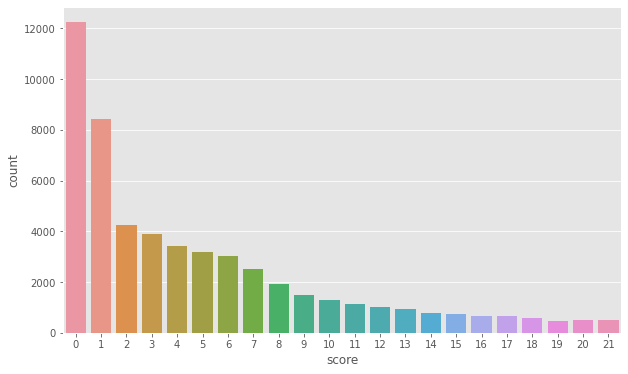

In [5]:
# Plot the score distribution
sns.countplot('score', data=df);

The plot shows that most of the diagnoses are having 'low to minimum' score.

Let's segment the score in different severity levels as described in the problem statement.

In [6]:
# Group the score as per severity
bins = [0, 5, 10, 15, 21]
labels = ['low', 'mild', 'moderate', 'severe']
df['severity'] = pd.cut(df['score'], bins=bins, labels=labels, include_lowest=True).astype('str')
df.sample(3)

,date,patient_id,type,patient_date_created,score,severity
33011,2020-07-13T16:00:41.811278,2845,gad7,2020-02-03T17:04:40.356835,2,low
32439,2020-04-22T22:38:42.477216,8733,gad7,2020-01-29T19:11:40.838934,0,low
30370,2020-01-16T16:07:30.411627,5149,gad7,2020-01-16T16:03:37.130791,3,low


Let's see how the scores are distributed in the severity level.

low         65.927968
mild        19.134791
moderate     8.661403
severe       6.275839
Name: severity, dtype: float64


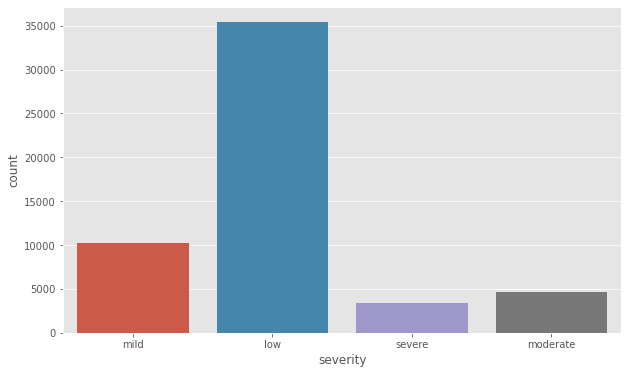

In [7]:
# Print severity percentage
print(df['severity'].value_counts(normalize=True)*100)

# Plot the severity distribution
sns.countplot('severity', data=df);

We have already seen that most of the diagnoses are low to minimum score. Here we can see that only 6% diagnoses are severe.

As the recommended threshold for further clinical evaluation is a score of 10 or greater, let's create a column to find who has been moved to the further clinical evaluation. If the score is 10 or greater, then 1 (which means yes) else 0 (which means no).

In [8]:
# Select clinical evaluation as yes or no
bins = [0, 9, 21]
labels = [0, 1] # 0 == No, 1 == Yes
df['clinical_evaluation'] = pd.cut(df['score'], bins=bins, labels=labels, include_lowest=True).astype(int)
df.head()

,date,patient_id,type,patient_date_created,score,severity,clinical_evaluation
0,2019-08-26T13:32:43.019162,8430,gad7,2019-06-03T13:23:02.63568,6,mild,0
1,2019-11-15T17:55:11.364877,8430,gad7,2019-06-03T13:23:02.63568,1,low,0
2,2019-10-07T18:23:29.611351,14338,gad7,2019-06-03T13:32:30.66846,10,mild,1
3,2019-11-04T20:16:28.610965,14338,gad7,2019-06-03T13:32:30.66846,7,mild,0
4,2019-12-02T20:56:55.966354,14338,gad7,2019-06-03T13:32:30.66846,9,mild,0


0    82.679057
1    17.320943
Name: clinical_evaluation, dtype: float64


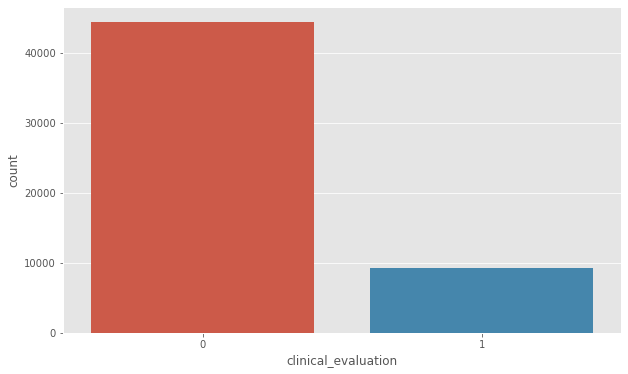

In [9]:
# Count yes and no of clinical evaluation
print(df['clinical_evaluation'].value_counts(normalize=True)*100)

# Plot the distribution of clinical evaluation
sns.countplot('clinical_evaluation', data=df);

It's not surprising that only 17% of diagnoses required further clinical evaluation.

Let's create four new features out of the date column to understand which month, day and when the patients took the diagnoses. It would help us understand if date or time influences patients' mental state.

In [10]:
# Change to datetime
df['date'] = pd.to_datetime(df['date'])
df['patient_date_created'] = pd.to_datetime(df['patient_date_created'])

# Extract years
year = df[['date']].apply(lambda x: dt.datetime.strftime(x['date'], '%Y'), axis=1)

# Extract months
month = df[['date']].apply(lambda x: dt.datetime.strftime(x['date'], '%B'), axis=1)

# Extract days
weekday = df[['date']].apply(lambda x: dt.datetime.strftime(x['date'], '%A'), axis=1)

# Extract hour
hour = df[['date']].apply(lambda x: dt.datetime.strftime(x['date'], '%H'), axis=1)

# Insert them sequencially into the dataset
df.insert(1,'year', year)
df.insert(2,'month', month)
df.insert(3,'weekday', weekday)
df.insert(4,'hour', hour)
df.sample(3)

,date,year,month,weekday,hour,patient_id,type,patient_date_created,score,severity,clinical_evaluation
9349,2019-12-12 15:00:52.247557,2019,December,Thursday,15,13747,gad7,2019-09-11 16:04:55.233496,3,low,0
51312,2020-07-24 20:57:52.914333,2020,July,Friday,20,12171,gad7,2020-05-27 16:15:04.292085,8,mild,0
18034,2020-03-09 19:49:49.910309,2020,March,Monday,19,7525,gad7,2019-11-11 15:07:27.612999,7,mild,0


Let's see the frequency as well as unique counts of days, month or hour.

In [11]:
df.describe(include='object').T

,count,unique,top,freq
year,53698,2,2020,40241
month,53698,12,April,7072
weekday,53698,7,Wednesday,13753
hour,53698,24,14,6091
type,53698,1,gad7,53698
severity,53698,4,low,35402


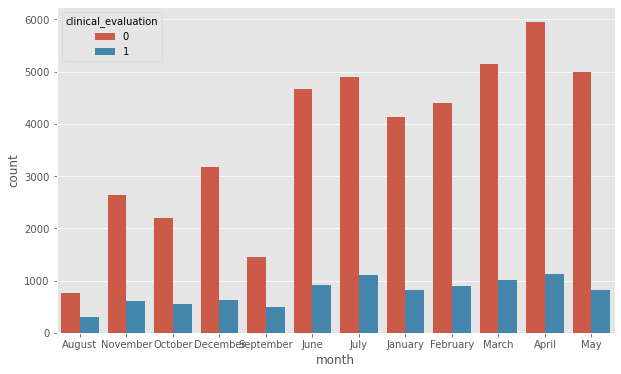

In [12]:
# Plot the distribution of month
sns.countplot('month', hue='clinical_evaluation', data=df);

In April, most of the diagnoses are conducted, followed by May. However, May and July are quite same considering the number of diagnoses needed further clinical evaluation.

Let's see which month has the highest probability of being clinically evaluated further.

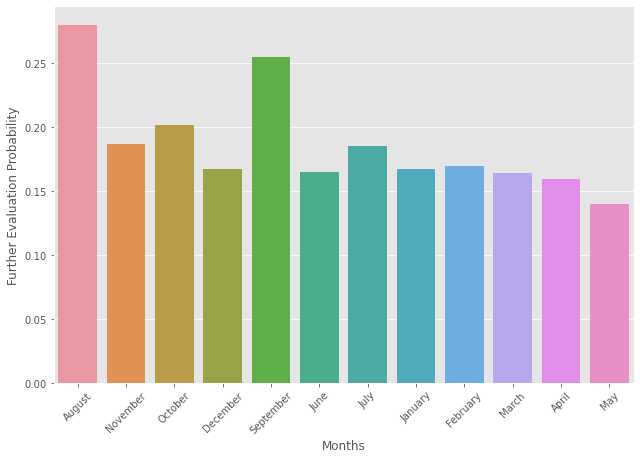

In [13]:
sns.catplot(x='month', y='clinical_evaluation',
            data=df, kind='bar', height=6, 
            aspect=1.5, ci=None)
plt.ylabel('Further Evaluation Probability')
plt.xlabel('Months')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Overall probability
df['clinical_evaluation'].mean()*100

17.32094305188275

The overall probability of being clinically evaluated further is 17.32%, whereas the probability goes up to 28% if the diagnoses are conducted in August.

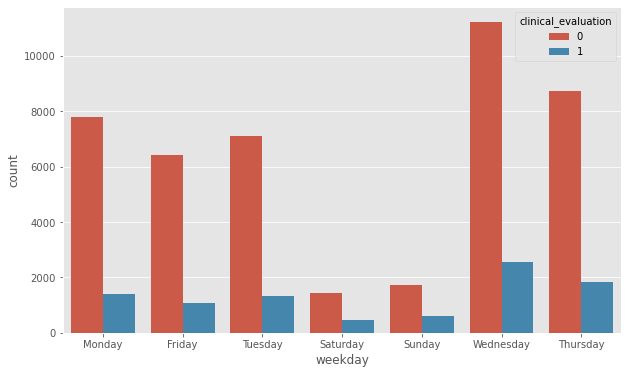

In [15]:
# Plot weekday distribution
sns.countplot('weekday', hue='clinical_evaluation', data=df);

It's Wednesday when most of the diagnoses are conducted. What's the probability of being evaluated further?

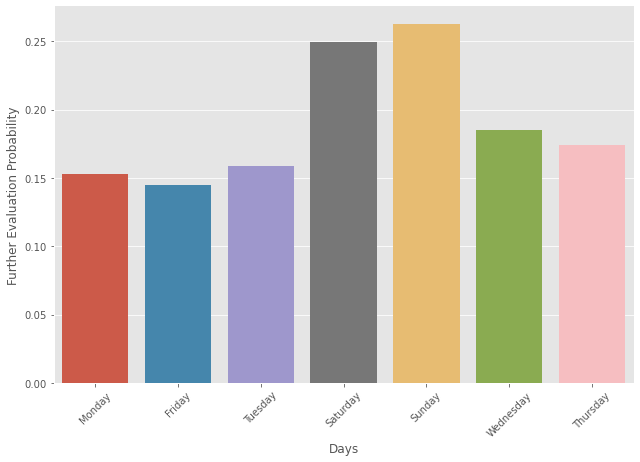

In [16]:
sns.catplot(x='weekday', y='clinical_evaluation',
            data=df, kind='bar',
            height=6,
            aspect=1.5,
            ci=None)
plt.ylabel('Further Evaluation Probability')
plt.xlabel('Days')
plt.xticks(rotation=45)
plt.show()

Wednesday comes to third when probability is considered. However, it's interesting that Sunday and Saturday have the lowest number of diagnoses but the highest probability of being evaluated further.

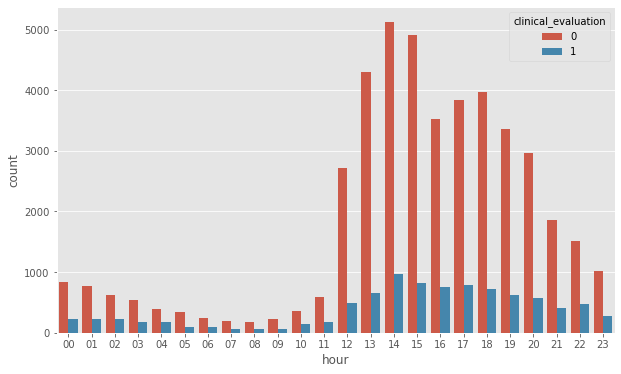

In [17]:
# Plot the distribution of hour
sns.countplot('hour', hue='clinical_evaluation', data=df);

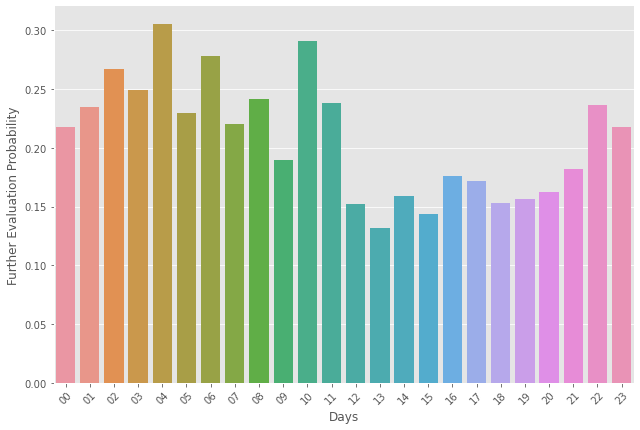

In [18]:
sns.catplot(x='hour', y='clinical_evaluation',
            data=df, kind='bar', height=6,
            aspect=1.5, ci=None)
plt.ylabel('Further Evaluation Probability')
plt.xlabel('Days')
plt.xticks(rotation=45)
plt.show()

Diagnoses are mostly conducted around 2:00pm, whereas early morning tests have higher chances of being evaluated further. It's quite surprising that stress level is high in early morning but low in the afternoon.

Let's steep back and create two new sub datasets to find the patients who took the diagnosis tests maximum number of times:
<br>
1) The dataset of the patients who took maximum numbers of tests.
</br>
2) The dataset of the patients who were clinically evaluated further maximum number of times.

,clinical_evaluation
patient_id,
10687,84
6574,42
12307,38
13855,34
13874,34


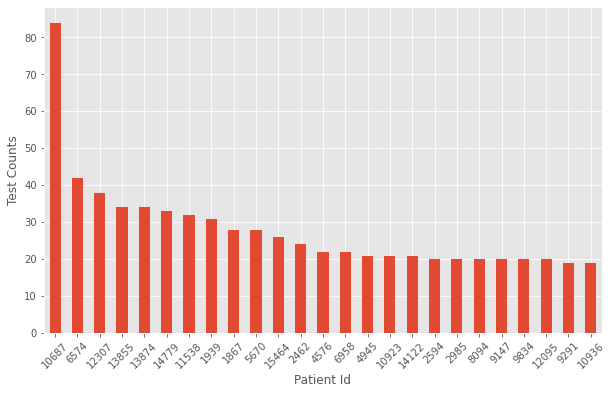

In [19]:
# Dataset of patients with maximum numbers of tests
df_max = df.groupby('patient_id').\
                        agg({'clinical_evaluation': "count"})
df_top_25 = df_max.nlargest(25, 'clinical_evaluation')
display(df_top_25.head())

# Plot their distribution
df_top_25['clinical_evaluation'].plot(kind='bar')
plt.ylabel('Test Counts')
plt.xlabel('Patient Id')
plt.xticks(rotation=45)
plt.show()

The patient with the id '10687' went through the maximum number of diagnoses. Let's see who went through the maximum number of further evaluations.

,clinical_evaluation
patient_id,
10687,83
11538,32
14717,19
1867,18
9291,18


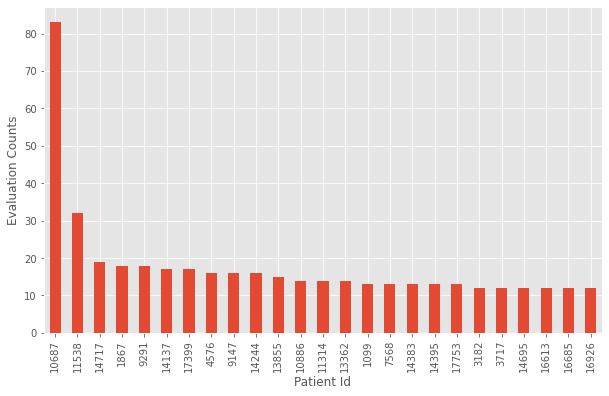

In [20]:
# Dataset of patients with maximum numbers of further evaluation
df_yes = df[df['clinical_evaluation'] == 1].groupby('patient_id').\
                        agg({'clinical_evaluation': "count"})
df_yes_25 = df_yes.nlargest(25, 'clinical_evaluation')
display(df_yes_25.head())

# Plot their distribution
df_yes_25['clinical_evaluation'].plot(kind='bar')
plt.ylabel('Evaluation Counts')
plt.xlabel('Patient Id')
plt.show()

The same patient with highest number of diagnoses also went through the highest number of further evaluations. Quite interesting!

Let's take a closer look of the patient who were most stressed.

In [21]:
most_stressed = df[df['patient_id'] == 10687]
most_stressed.groupby(['year', 'month', 'clinical_evaluation']).agg({'clinical_evaluation': 'count'})

clinical_evaluation
year month     clinical_evaluation                     
2019 August    1                                     11
     July      1                                     15
     June      0                                      1
               1                                      6
     November  1                                     16
     October   1                                     17
     September 1                                     18

It's quite surprising that in a 6-month period, the patient took 84 diagnosis tests and 83 diagnoses went for further evaluation.

Let's plot the patient's score distribution.

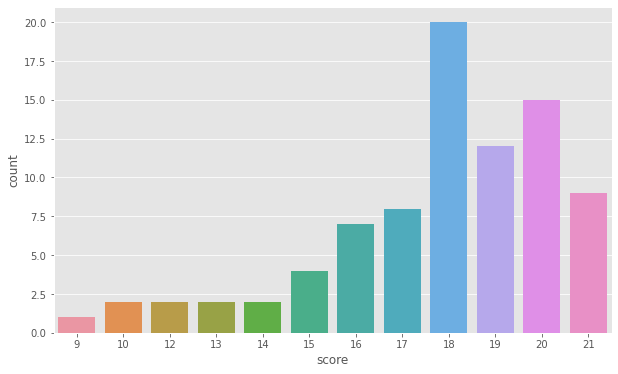

In [22]:
sns.countplot('score', 
              data=most_stressed);

The patient can be a great case study considering more than 60% of his diagnoses turned out to be severe.

As we have seen that a patient can be diagnosed as severe or low in different tests, let's group the patients in three different segments:
<br>1) No: Patients who never needed any further evaluation (only 'no' but never needed 'yes').
</br>
2) Yes: Patients who directly went to the further evaluation (only 'yes').
</br>
3) NoYes: Patients who needed both--in one occasion 'no' and in another 'yes'.

In [23]:
df['clinical_evaluation'] = df['clinical_evaluation'].map({0: 'No', 1:'Yes'})
Ptype = pd.crosstab(df['patient_id'], df['clinical_evaluation'])
df['status'] = df['patient_id'].map(Ptype.ne(0).dot(Ptype.columns))
df['clinical_evaluation'] = df['clinical_evaluation'].map({'No': 0, 'Yes': 1})
df.sample(5)

,date,year,month,weekday,hour,patient_id,type,patient_date_created,score,severity,clinical_evaluation,status
3479,2019-10-04 18:54:02.776362,2019,October,Friday,18,14759,gad7,2019-08-03 10:45:50.721946,12,moderate,1,NoYes
8757,2019-11-04 17:25:36.212053,2019,November,Monday,17,874,gad7,2019-09-05 15:51:02.108261,9,mild,0,NoYes
51112,2020-05-29 22:55:02.049105,2020,May,Friday,22,10911,gad7,2020-05-21 06:58:03.975806,20,severe,1,Yes
30050,2020-03-30 14:55:56.392168,2020,March,Monday,14,8017,gad7,2020-01-15 18:10:34.928127,1,low,0,No
141,2019-07-09 13:41:48.225209,2019,July,Tuesday,13,16617,gad7,2019-06-04 19:28:38.734048,14,moderate,1,Yes


No       68.438303
NoYes    23.885433
Yes       7.676264
Name: status, dtype: float64


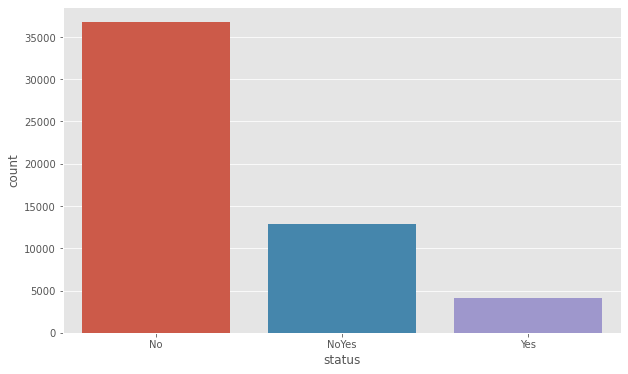

In [24]:
# Count each group
print(df['status'].value_counts(normalize=True)*100)

# Plot the status distribution
sns.countplot('status', data=df);

We have seen before that about 82% of tests didn't need further evaluation. However, when separate the patients into three groups, we can see that about 68% patients never needed for further evaluation, about 23% patients went through both the situation and only 7% patients needed straight evaluation.

Let's see which patients never needed further evaluation.

,clinical_evaluation
patient_id,
12307,38
13874,34
14779,33
2462,24
6958,22


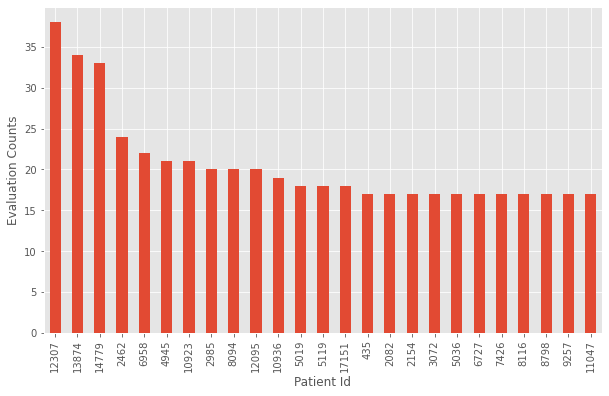

In [25]:
df_no_all= df[df['status'] == 'No'].groupby('patient_id').\
                                agg({'clinical_evaluation': "count"})
df_no_all_25 = df_no_all.nlargest(25, 'clinical_evaluation')
display(df_no_all_25.head())

# Plot their distribution        
df_no_all_25['clinical_evaluation'].plot(kind='bar')
plt.ylabel('Evaluation Counts')
plt.xlabel('Patient Id')
plt.show()

The patient id '12307' took about 40 diagnoses but needed scored beyond 9.

Let's see which patients always scored 10 or more than 10 and needed further evaluations. 

,clinical_evaluation
patient_id,
11538,32
14717,19
14137,17
14244,16
11314,14


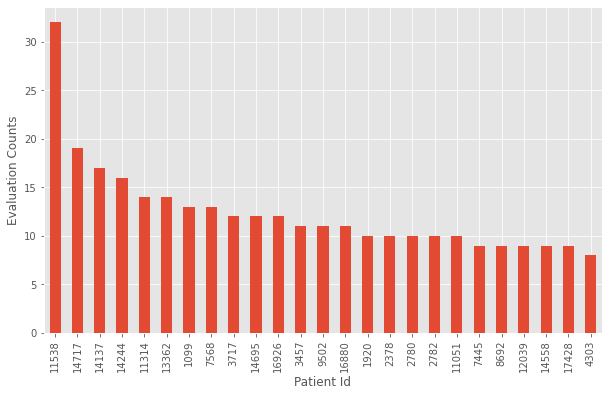

In [26]:
df_yes_all= df[df['status'] == 'Yes'].groupby('patient_id').\
                        agg({'clinical_evaluation': "count"})
df_yes_all_25 = df_yes_all.nlargest(25, 'clinical_evaluation')
display(df_yes_all_25.head())

df_yes_all_25['clinical_evaluation'].plot(kind='bar')
plt.ylabel('Evaluation Counts')
plt.xlabel('Patient Id')
plt.show()

### **Additional assumptions**

During plotting the probability of being clinically evaluated further, I have made the assumption that all the attributes are independent as well as normally distributed for which I didn’t perform any statistical testing.

### **Additional information**

* It would be great to collect the information on 'age', 'gender', 'ethnicity', 'employement', 'marital status' and 'income'.
* It would also be great if we could collect when the further clinical evaluation happened so that we can evaluate weather the further therapy has helped or not.

# **Part 2**

Answer: SQL 1

Answer: SQL 2

Answer: SQL 3